Descriptive Analysis after Two-Step Cluster Analysis

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [10]:
os.chdir('C:\\Users\\gmgno\\OneDrive\\Desktop\\University\\Adaptive Learning\\PROFFILO')

In [11]:
data = pd.read_excel('Standardization_cluster.xlsx')
data.head(10)

,raven,motion,vispa,nwrt,wm,output
0,1,14,13,6,5,1
1,2,4,20,2,11,1
2,2,8,23,2,10,1
3,2,4,29,5,11,2
4,5,4,32,2,4,1
5,3,7,27,2,8,1
6,1,5,30,1,8,1
7,6,10,12,1,3,1
8,1,4,22,2,10,1
9,3,8,26,7,3,1


In [12]:
data_1 = data[data['output']==1]
data_1.head()

,raven,motion,vispa,nwrt,wm,output
0,1,14,13,6,5,1
1,2,4,20,2,11,1
2,2,8,23,2,10,1
4,5,4,32,2,4,1
5,3,7,27,2,8,1


In [13]:
data_2 = data[data['output']==2]
data_2.head()

,raven,motion,vispa,nwrt,wm,output
3,2,4,29,5,11,2
18,1,4,27,1,10,2
26,0,6,31,2,14,2
30,0,4,31,3,11,2
32,2,1,31,2,13,2


In [14]:
mean_raven_1 = data_1['raven'].mean()
mean_motion_1 = data_1['motion'].mean()
mean_vispa_1 = data_1['vispa'].mean()
mean_nwrt_1 = data_1['nwrt'].mean()
mean_wm_1 = data_1['wm'].mean()
print(mean_raven_1)
print(mean_motion_1)
print(mean_vispa_1)
print(mean_nwrt_1)
print(mean_wm_1)

2.8676470588235294
7.323529411764706
22.58823529411765
2.426470588235294
7.485294117647059


In [15]:
mean_raven_2 = data_2['raven'].mean()
mean_motion_2 = data_2['motion'].mean()
mean_vispa_2 = data_2['vispa'].mean()
mean_nwrt_2 = data_2['nwrt'].mean()
mean_wm_2 = data_2['wm'].mean()
print(mean_raven_2)
print(mean_motion_2)
print(mean_vispa_2)
print(mean_nwrt_2)
print(mean_wm_2)

1.608695652173913
5.3478260869565215
28.195652173913043
2.4130434782608696
13.91304347826087


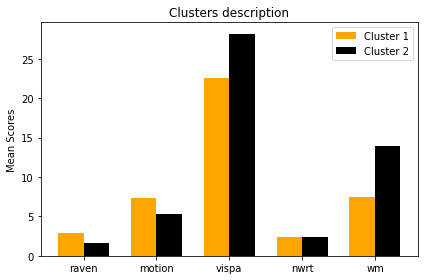

In [16]:
labels = ['raven', 'motion', 'vispa', 'nwrt', 'wm']
means_cluster_1 = [mean_raven_1, mean_motion_1, mean_vispa_1, mean_nwrt_1, mean_wm_1]
means_cluster_2 = [mean_raven_2, mean_motion_2, mean_vispa_2, mean_nwrt_2, mean_wm_2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, means_cluster_1, width, color = 'orange', label='Cluster 1')
rects2 = ax.bar(x + width/2, means_cluster_2, width, color = 'black', label='Cluster 2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Scores')
ax.set_title('Clusters description')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics
import collections
from collections import Counter
import statistics 

In [17]:
data['output'] = data['output'].astype('category')
response = 'output'
predictors = data.columns
predictors = data.drop(['output'], axis = 1)
print(predictors.head())

   raven  motion  vispa  nwrt  wm
0      1      14     13     6   5
1      2       4     20     2  11
2      2       8     23     2  10
3      2       4     29     5  11
4      5       4     32     2   4


In [18]:
mmscaler = MinMaxScaler()
data_norm = pd.DataFrame(mmscaler.fit_transform(predictors))
data_norm.columns = ['raven', 'motion', 'vispa', 'nwrt', 'wm']
print((data_norm).head(10))

      raven    motion     vispa      nwrt        wm
0  0.111111  0.722222  0.111111  0.714286  0.214286
1  0.222222  0.166667  0.370370  0.142857  0.642857
2  0.222222  0.388889  0.481481  0.142857  0.571429
3  0.222222  0.166667  0.703704  0.571429  0.642857
4  0.555556  0.166667  0.814815  0.142857  0.142857
5  0.333333  0.333333  0.629630  0.142857  0.428571
6  0.111111  0.222222  0.740741  0.000000  0.428571
7  0.666667  0.500000  0.074074  0.000000  0.071429
8  0.111111  0.166667  0.444444  0.142857  0.571429
9  0.333333  0.388889  0.592593  0.857143  0.071429


In [19]:
x = data_norm[['raven', 'motion', 'vispa', 'nwrt', 'wm']]
y = data.output
print(y)
print(x)

0      1
1      1
2      1
3      2
4      1
      ..
109    2
110    2
111    2
112    2
113    1
Name: output, Length: 114, dtype: category
Categories (2, int64): [1, 2]
        raven    motion     vispa      nwrt        wm
0    0.111111  0.722222  0.111111  0.714286  0.214286
1    0.222222  0.166667  0.370370  0.142857  0.642857
2    0.222222  0.388889  0.481481  0.142857  0.571429
3    0.222222  0.166667  0.703704  0.571429  0.642857
4    0.555556  0.166667  0.814815  0.142857  0.142857
..        ...       ...       ...       ...       ...
109  0.333333  0.166667  1.000000  0.428571  0.785714
110  0.333333  0.555556  0.444444  0.142857  0.928571
111  0.444444  0.500000  0.629630  0.571429  1.000000
112  0.444444  0.222222  0.703704  0.285714  0.857143
113  0.666667  0.333333  0.592593  0.428571  0.428571

[114 rows x 5 columns]


In [20]:
x_train, x_test, y_train, y_test =\
            train_test_split(x, y, test_size = 0.20, stratify = y, random_state = 1)
x_train.shape

(91, 5)

In [21]:
model = AdaBoostClassifier()

In [22]:
grid = dict()
grid['n_estimators'] = [10, 50, 100, 300, 500, 700]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

In [23]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

In [24]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, n_jobs = -1, cv = cv, scoring = 'accuracy')

In [25]:
grid_result = grid_search.fit(x_train, y_train)

In [26]:
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: 0.937778 using {'learning_rate': 0.01, 'n_estimators': 700}


In [32]:
print(grid_result.best_score_)

0.9377777777777777


In [37]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

0.911852 (0.087814) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.911852 (0.087814) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.911852 (0.087814) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.911852 (0.087814) with: {'learning_rate': 0.0001, 'n_estimators': 300}
0.911852 (0.087814) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.911852 (0.087814) with: {'learning_rate': 0.0001, 'n_estimators': 700}
0.911852 (0.087814) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.911852 (0.087814) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.911852 (0.087814) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.911852 (0.087814) with: {'learning_rate': 0.001, 'n_estimators': 300}
0.911852 (0.087814) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.911852 (0.087814) with: {'learning_rate': 0.001, 'n_estimators': 700}
0.911852 (0.087814) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.911852 (0.087814) with: {'learning_rate': 0.01, 'n_estimators'

In [42]:
best = grid_result.best_estimator_
train_predictions = best.predict(x_train)
test_predictions = best.predict(x_test)

print('Train Score:', accuracy_score(train_predictions, y_train)) 
print('Test Score:', accuracy_score(test_predictions, y_test)) 

Train Score: 0.978021978021978
Test Score: 0.9565217391304348


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_predictions)
print(confusion_matrix)

[[13  1]
 [ 0  9]]


In [67]:
precision_ada = metrics.precision_score(y_test, test_predictions)
recall_ada = metrics.recall_score(y_test, test_predictions)
f1_ada = metrics.f1_score(y_test, test_predictions, average=None)
print(precision_ada)
print(recall_ada)
print(f1_ada)

1.0
0.9285714285714286
[0.96296296 0.94736842]


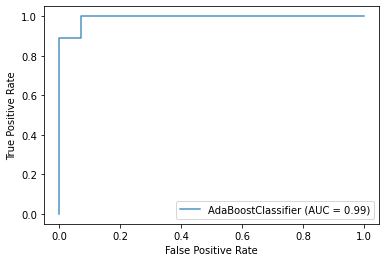

In [51]:
#ada_disp = metrics.plot_roc_curve(best, x_test, y_test)
ax = plt.gca()
ada_disp = metrics.plot_roc_curve(best, x_test, y_test, ax=ax, alpha=0.8)
#svc_disp.plot(ax=ax, alpha=0.8)
plt.show()